In [ ]:
# 1) use the "GraidentTape API" to find the derivative of the function f(x) = sin(x) for x = 0, 0.1, 0.2 and 0.3. Submit your Jupyter notebook that shows both the code and the result you got
# 2) for the task "Classifying movie reviews: A binary classification example", tune the hyper-parameters of the model (such as changing the number of layers, changing the sizes of layers, changing the optimizer, changing the learning rate, etc.), and see if you can improve the model's performance. Submit a Jupyter notebook where you clearly show the code with the best hyper-parameters that you have found, along with its performance on training, validation and test sets.

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
  y = tf.math.sin(x)
gradient_of_sin = tape.gradient(y,x)
gradient_of_sin

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
import tensorflow as tf
x = tf.Variable(0.1)
with tf.GradientTape() as tape:
  y = tf.math.sin(x)
gradient_of_sin = tape.gradient(y,x)
gradient_of_sin

<tf.Tensor: shape=(), dtype=float32, numpy=0.9950042>

In [ ]:
import tensorflow as tf
x = tf.Variable(0.2)
with tf.GradientTape() as tape:
  y = tf.math.sin(x)
gradient_of_sin = tape.gradient(y,x)
gradient_of_sin

<tf.Tensor: shape=(), dtype=float32, numpy=0.9800666>

In [ ]:
import tensorflow as tf
x = tf.Variable(0.3)
with tf.GradientTape() as tape:
  y = tf.math.sin(x)
gradient_of_sin = tape.gradient(y,x)
gradient_of_sin

<tf.Tensor: shape=(), dtype=float32, numpy=0.9553365>

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5244 - accuracy: 0.7823 - val_loss: 0.4219 - val_accuracy: 0.8319
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3138 - accuracy: 0.9032 - val_loss: 0.3141 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2278 - accuracy: 0.9283 - val_loss: 0.2803 - val_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1765 - accuracy: 0.9447 - val_loss: 0.2982 - val_accuracy: 0.8809
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1435 - accuracy: 0.9553 - val_loss: 0.3158 - val_accuracy: 0.8738
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1185 - accuracy: 0.9638 - val_loss: 0.3006 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1002 - accuracy: 0.9699 - val_loss: 0.3140 - val_accuracy: 0.8853
Epoch 8/20
30

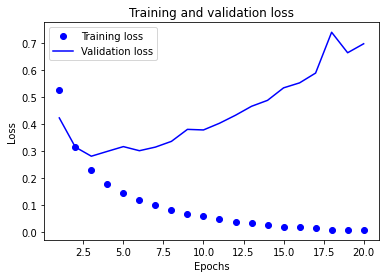

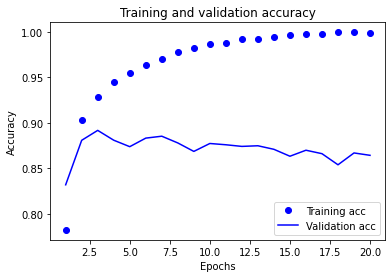

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4682 - accuracy: 0.8198
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2627 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2025 - accuracy: 0.9284
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3026 - accuracy: 0.8815


[0.30263352394104004, 0.8815199732780457]

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]
train_labels[0]
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]
train_labels[0]
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(5, activation="relu"),
    layers.Dense(5, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.5770 - accuracy: 0.7996
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.4045 - accuracy: 0.8847
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.3052 - accuracy: 0.9029
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2896 - accuracy: 0.8900


[0.2896204888820648, 0.8900399804115295]

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5233 - accuracy: 0.7758 - val_loss: 0.3914 - val_accuracy: 0.8665
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3117 - accuracy: 0.8995 - val_loss: 0.3225 - val_accuracy: 0.8733
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2263 - accuracy: 0.9297 - val_loss: 0.2890 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1782 - accuracy: 0.9418 - val_loss: 0.2767 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1420 - accuracy: 0.9554 - val_loss: 0.2889 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1150 - accuracy: 0.9654 - val_loss: 0.3186 - val_accuracy: 0.8791
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0944 - accurac

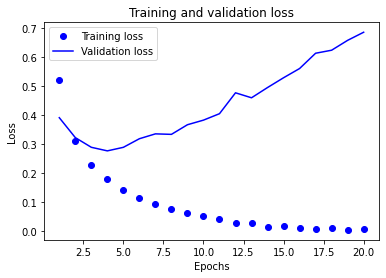

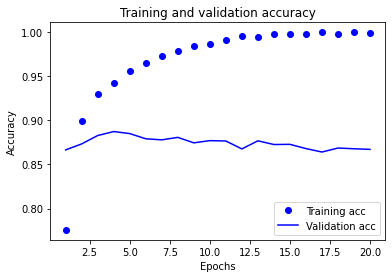

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5859 - accuracy: 0.6983
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.4636 - accuracy: 0.8630
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.3971 - accuracy: 0.9093
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3864 - accuracy: 0.8785


[0.386393666267395, 0.8784800171852112]

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]
train_labels[0]
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(5, activation="relu"),
    layers.Dense(5, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results